In [98]:
import numpy as np 
import pandas as pd

df = pd.read_csv(
    ".././data/COVID-19_aantallen_gemeente_per_dag.csv",
    sep=";",
)


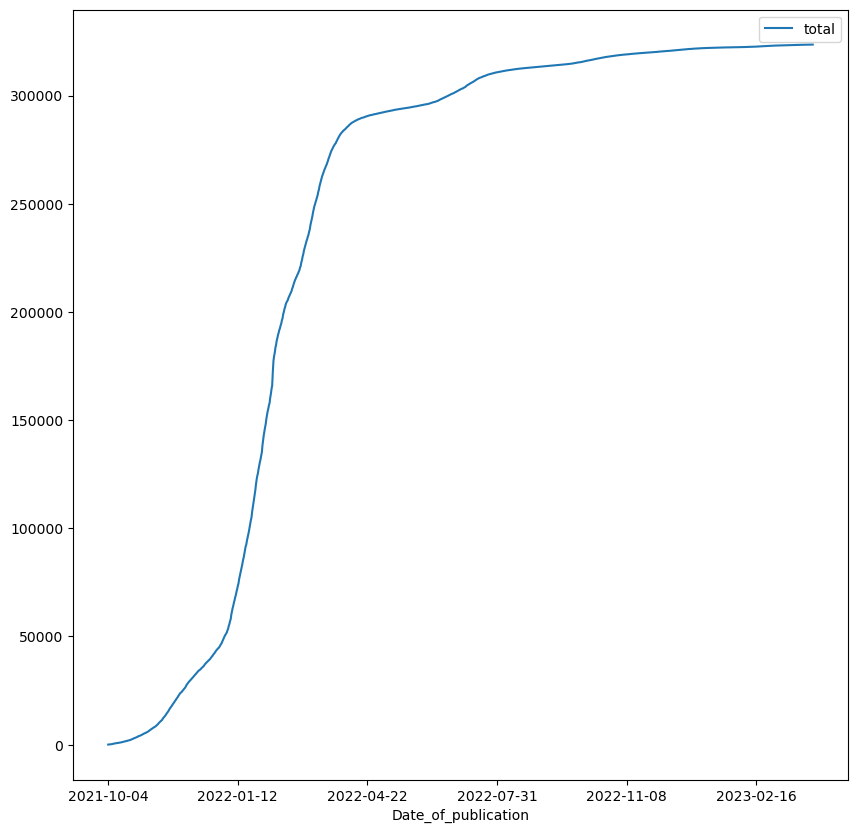

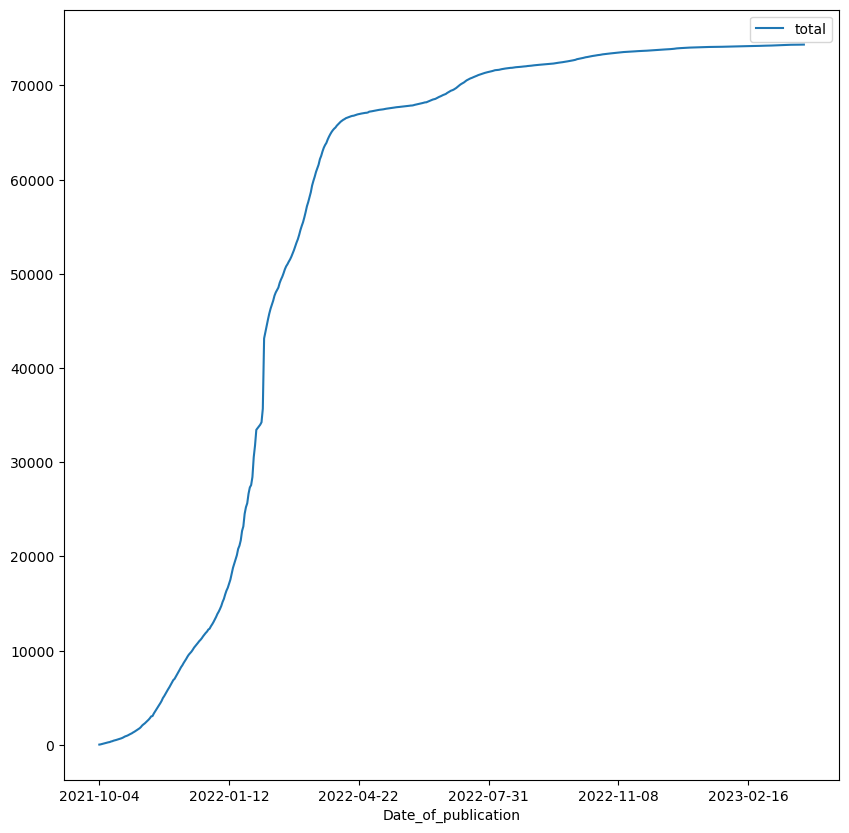

In [99]:
def plot_data(df: pd.DataFrame, Municipality_name: str):
    df = df.copy(deep=True)
    df = df[df["Province"].notna()]
    df = df[df['Municipality_name'] == Municipality_name]

    df['total'] = df['Total_reported'].cumsum()

    df.plot(x='Date_of_publication', y='total', kind='line', figsize=(10,10))

plot_data(df, 'Amsterdam')
plot_data(df, 'Almere')

In [35]:
## 2.

# b) # richard growth function definition

def logistic_growth_RG(t,F,IR,L,C): 
    # F -> final epidemic size t1 (hyperparmeter see notes)
    # IR -> infection rate t2
    # L -> lag phase t3
    # C -> carrying capacity or limit Epsilon
    numerator = F 
    expo = math.e**(-IR * (t-L))
    denominator = (1 + C * expo)**1/C 
    return numerator / denominator 
"""
notes: 
there's a formula for final epidemic size I don't believe its exactly = to total pop
but rn I set the hyper param as 18,092,524 pop size at the end of 2023 
_
"""


"\nnotes: \nthere's a formula for final epidemic size I don't believe its exactly = to total pop\nbut rn I set the hyper param as 18,092,524 pop size at the end of 2023 \n_\n"

53413
Optimal Parameters: IR=0.027602488825279124, L=79.14583761103451, C=-0.11252023028242919


/tmp/ipykernel_30/370862587.py:31: RuntimeWarning: invalid value encountered in power
  denominator = (1 + C * expo)**(1 / C)


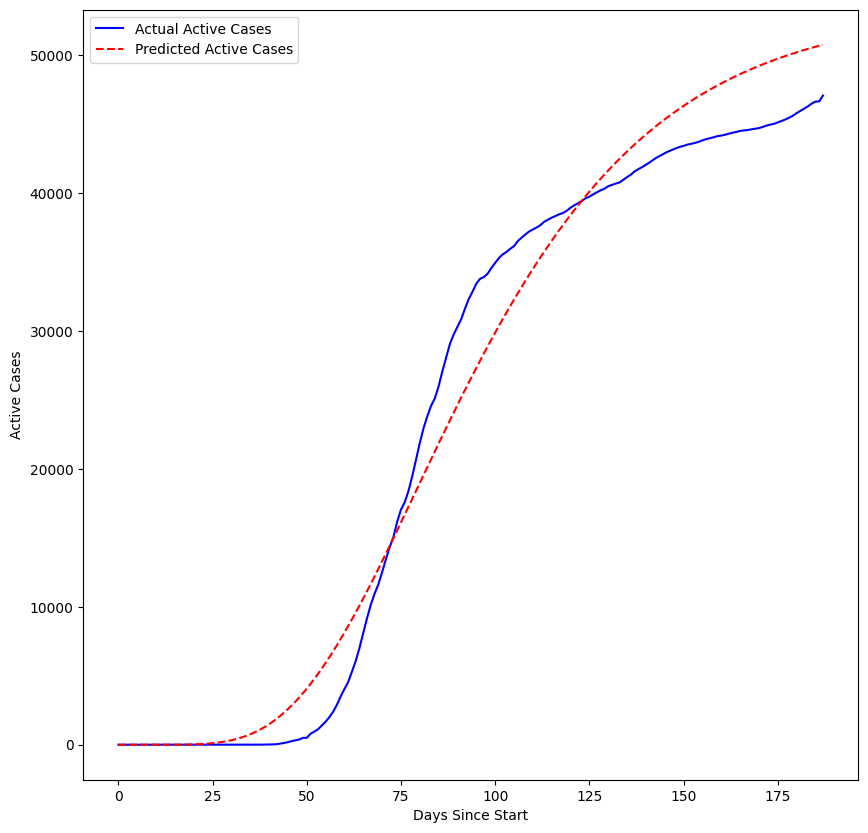

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit


# Selected cols from ontology -> country , date, active cases 
netherlands_data = df[df['Country/Region'] == 'Netherlands'][['Date', 'Country/Region', 'Active']]
netherlands_data = netherlands_data.reset_index(drop=True)

# Date -> datetime format 
netherlands_data['Date'] = pd.to_datetime(netherlands_data['Date'])

# Create a 'Days' column that counts days since the first date
netherlands_data['Days'] = (netherlands_data['Date'] - netherlands_data['Date'].min()).dt.days

# IO,target active cases based on days 
X = netherlands_data['Days'].values
y = netherlands_data['Active'].values  

# hyperparameter F_NL20200727
nl = df[df['Country/Region'] == 'Netherlands'][['Date', "Confirmed"]]
F_NL20200727 = nl["Confirmed"].max()  
print(F_NL20200727)

# the Richards (generalized logistic) growth function from previous cell 
def logistic_growth_RG(t, F, IR, L, C): 
    numerator = F
    expo = math.e**(-IR * (t - L))
    denominator = (1 + C * expo)**(1 / C)
    return numerator / denominator

# Function for curve fitting, keeping F fixed as hyperparameter
def logistic_growth_fixed_F(t, IR, L, C):
    return logistic_growth_RG(t, F_NL20200727, IR, L, C)

# 4. Initial guesses for the parameters IR, L, and C
initial_guess = [0.1, 10, 1000]

# fitting model using sum of squared residuals, optim param and covariance 
popt, pcov = curve_fit(logistic_growth_fixed_F, X, y, p0=initial_guess) 

# Extract optimized parameters
IR_opt, L_opt, C_opt = popt
print(f"Optimal Parameters: IR={IR_opt}, L={L_opt}, C={C_opt}")

# Visualising 
y_pred = logistic_growth_fixed_F(X, IR_opt, L_opt, C_opt) # predictions

plt.figure(figsize=(10, 10))
plt.plot(X, y, 'b', label='Actual Active Cases')
plt.plot(X, y_pred, 'r--', label='Predicted Active Cases')
plt.xlabel('Days Since Start')
plt.ylabel('Active Cases')
plt.legend()
plt.show()


# error rate to do calc


In [ ]:
#### TESTING 
import math

def logistic_growth(t,F,IR,L,C): 
    # F -> final epidemic size t1
    # IR -> infection rate t2
    # L -> lag phase t3
    # C -> carrying capacity or limit Epsilon
    numerator = F 
    expo = math.e**(-IR * (t-L))
    denominator = (1 + C * expo)**1/C 
    return numerator / denominator 

logistic_growth_x = []

for day in range(1,100): 
    t = day
    logistic_growth_x.append(logistic_growth(day,10000,0.2,40,1000))

logistic_growth_y = [day for day in range(1,100)]

d = {'x': logistic_growth_x, 'y': logistic_growth_y}
df_f = pd.DataFrame(data=d)
df_f.plot()




In [ ]:
"""
General to do's wik, you can advance on them if Im not available 
1) figure out whether we change the dataset to dutch cities or change the ontology to only NL
1.1) fix the prediction problem, making the training data 80%, fix the final epidemic size variable
2) figure out how to import non rdf Data into the ontology, figure out how to export 
the imported data to a csv (import is just writing turtle format and creating strings that fit a certain pattern, 
exporting is just regex/pattern matching and transorming it into a csv with R/C)
3) make the notebook pretty 

"""